# Model

First, declare functions that will be used to analyse the variables and to create the model.

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
sb.set_theme()

data = pd.read_csv("../data/movies_with_vars.csv")

def performLinearRegression (data, predictor, response):
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)
    
    # Create a Linear Regression object
    linreg = LinearRegression()

    # Train the Linear Regression model
    linreg.fit(predictor_train, response_train)

    # Coefficients of the Linear Regression line
    b = linreg.intercept_
    a = linreg.coef_

    print('Intercept \t: b = ', b)
    print('Coefficients \t: a = ', a)
    print('R^2', linreg.score(predictor_train, response_train))

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(predictor_train, response_train)
    plt.plot(predictor_train, b + a * predictor_train, color = "red")
    plt.xlabel(predictor.columns[0])
    plt.ylabel(response.columns[0])
    plt.show()
    
    return linreg, predictor_train, predictor_test, response_train, response_test

def generateClassificationTree(data, predictorName,responseName, depth, class_names):
    print(f'{predictorName} vs. {responseName} with depth {depth}')
    response = pd.DataFrame(data[responseName]) # Response
    predictor = pd.DataFrame(data[predictorName]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a joint dataframe by concatenating Predictor and Response
    trainDF = pd.concat([predictor_train, response_train], axis = 1).reindex(predictor_train.index)

    # Joint Boxplot of Predictor Train against Response Train
    plt.figure(figsize=(12, 4))
    sb.swarmplot(x = predictorName, y = responseName, data = trainDF, orient = "h")

    # Create a Decision Tree Classifier object
    dectree = DecisionTreeClassifier(max_depth = depth)

    # Train the Decision Tree Classifier model
    dectree.fit(predictor, response)

    plt.figure(figsize=(16,16))
    plot_tree(dectree, filled=True, rounded=True, 
          feature_names=[predictorName], 
          class_names=class_names)

    # Print the Classification Accuracy
    print("Train Classification Accuracy \t:", dectree.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", dectree.score(predictor_test, response_test))

    response_train_pred = dectree.predict(predictor_train)
    response_test_pred = dectree.predict(predictor_test)
    
    return response_train, response_train_pred, response_test, response_test_pred

def generateConfusionMatrix(response, response_pred, title):
    print(title)
    plt.figure(figsize=(6,6))
    plt.title(title)
    sb.heatmap(confusion_matrix(response, response_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
    # find false positive and false negative from confusion matrix
    true_negative, false_positive, false_negative, true_positive = confusion_matrix(response, response_pred).ravel()
    print(f'True Positive Rate: {true_positive/(true_positive+false_negative)}')
    print(f'False Positive Rate: {false_positive/(false_positive+true_negative)}')
    print(f'True Negative Rate: {true_negative/(true_negative+false_positive)}')
    print(f'False Negative Rate: {false_negative/(false_negative+true_positive)}')
    
def generateRandomForestClassifier(data, predictor, response,n_estimators, depth, class_names):
    print(f'{predictor} vs. {response} with depth {depth}')
    response = pd.DataFrame(data[response]) # Response
    predictor = pd.DataFrame(data[predictor]) # Predictor

    # Using the sample() method to get a more random train and test set
    predictor_train, predictor_test, response_train, response_test = train_test_split(predictor,response, test_size = 0.25)

    # Create a Decision Tree Classifier object
    random_forest = RandomForestClassifier(n_estimators=n_estimators, max_depth = depth)

    # Train the Decision Tree Classifier model
    random_forest.fit(predictor_train, response_train)

    # Print the Train and Test Classification Accuracy
    print("Train Classification Accuracy \t:", random_forest.score(predictor_train, response_train))
    print("Test Classification Accuracy \t:", random_forest.score(predictor_test, response_test))

    response_train_pred = random_forest.predict(predictor_train)
    response_test_pred = random_forest.predict(predictor_test)

    return response_train, response_train_pred, response_test, response_test_pred
    

# Linear Regression

## Predictor vs. Vote Average

Intercept 	: b =  [6.42425727]
Coefficients 	: a =  [[0.14564158]]
R^2 0.002244697320871736


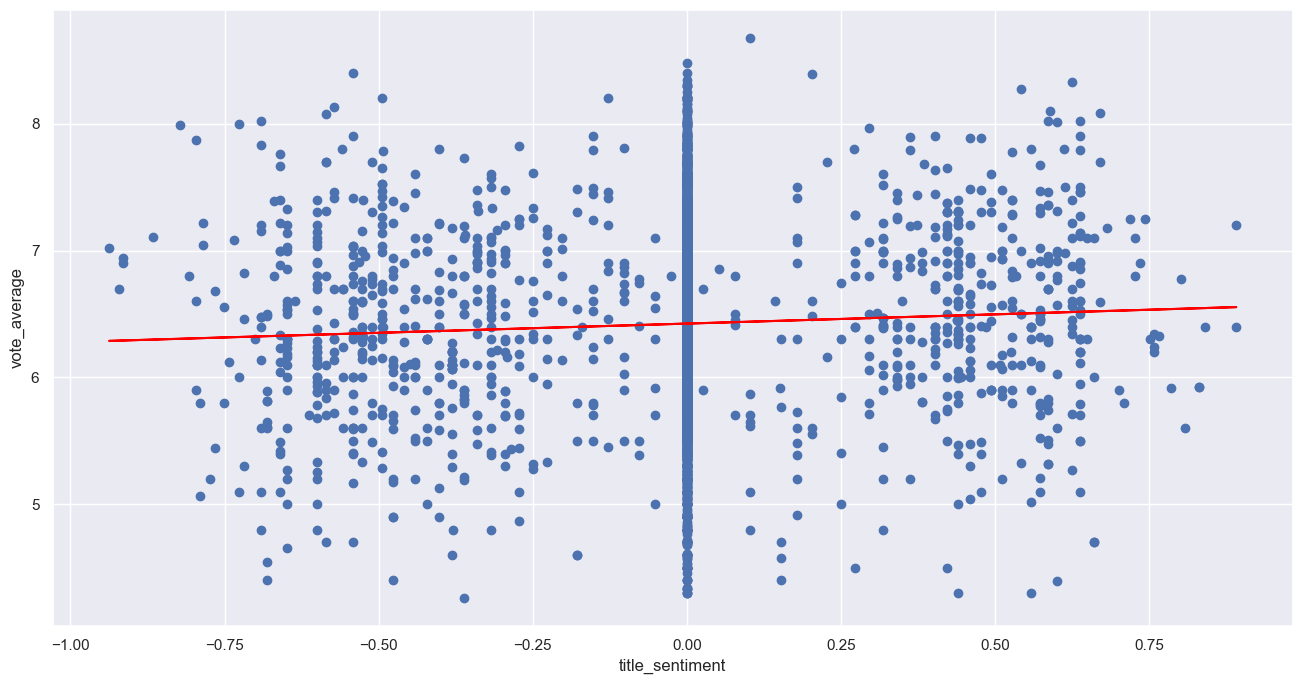

Intercept 	: b =  [6.4415442]
Coefficients 	: a =  [[0.1242455]]
R^2 0.010681076834025527


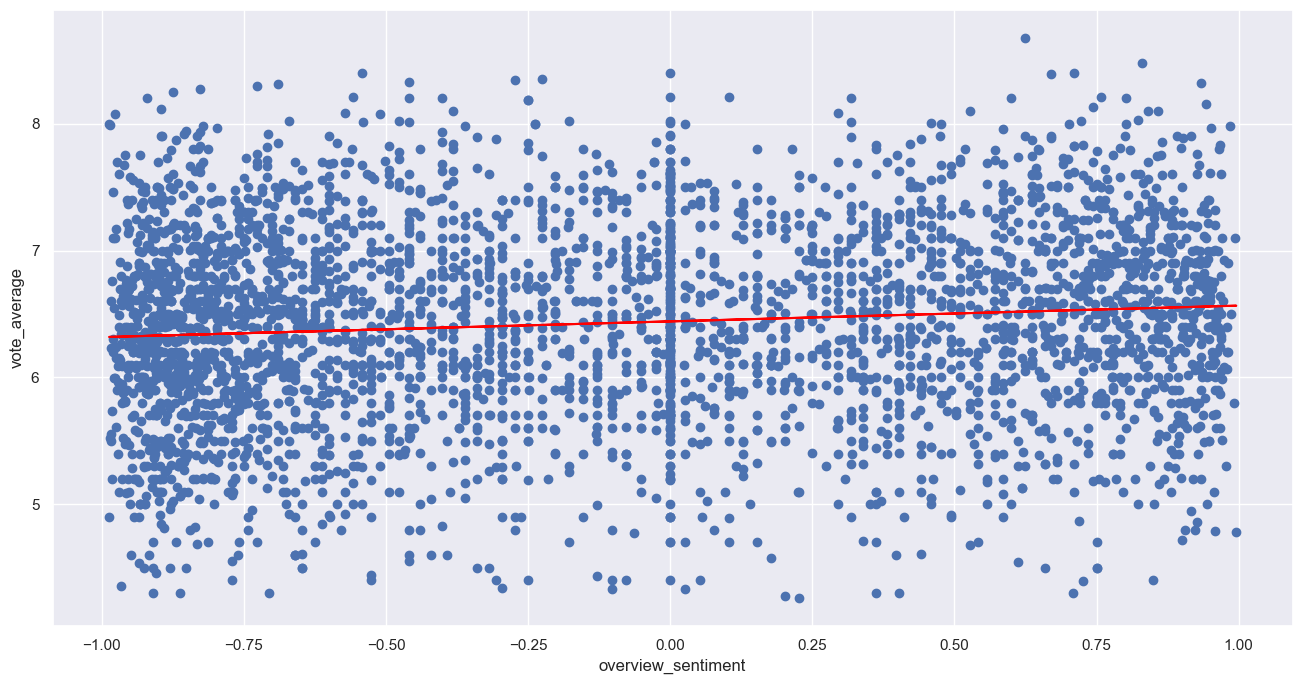

Intercept 	: b =  [6.3259576]
Coefficients 	: a =  [[0.00573576]]
R^2 0.005333519993420688


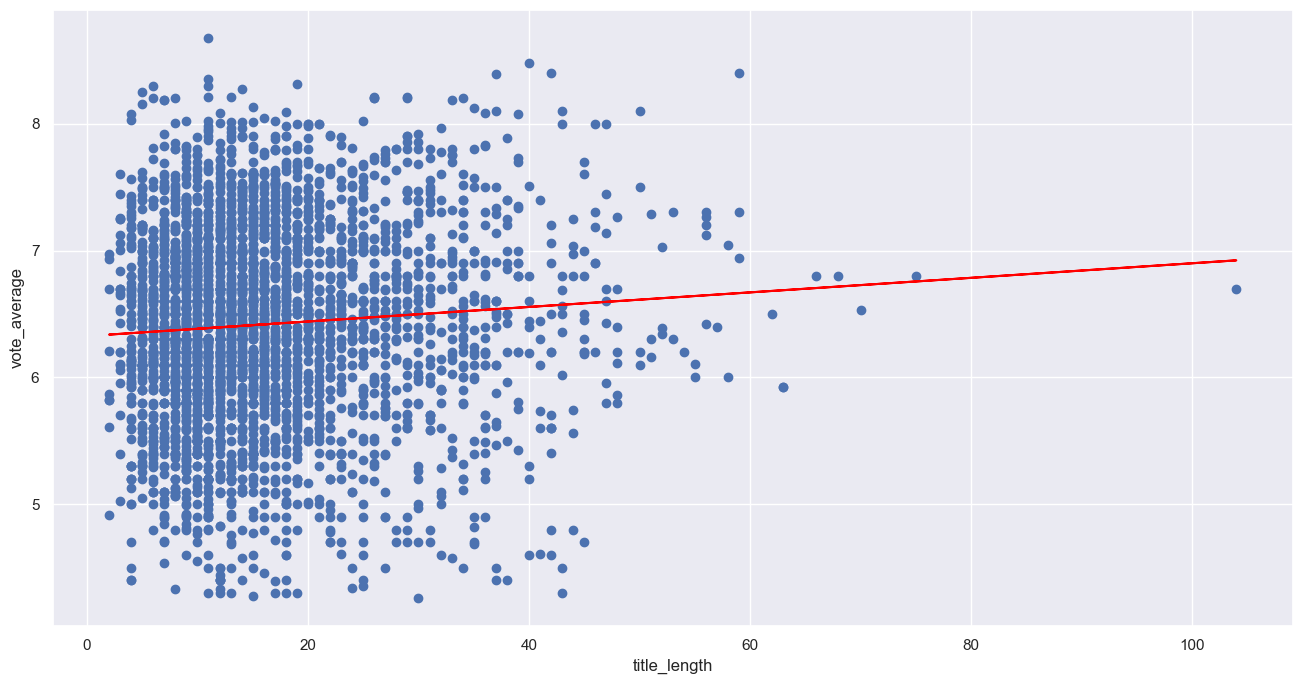

Intercept 	: b =  [6.33923847]
Coefficients 	: a =  [[0.02536286]]
R^2 0.0035098198762738564


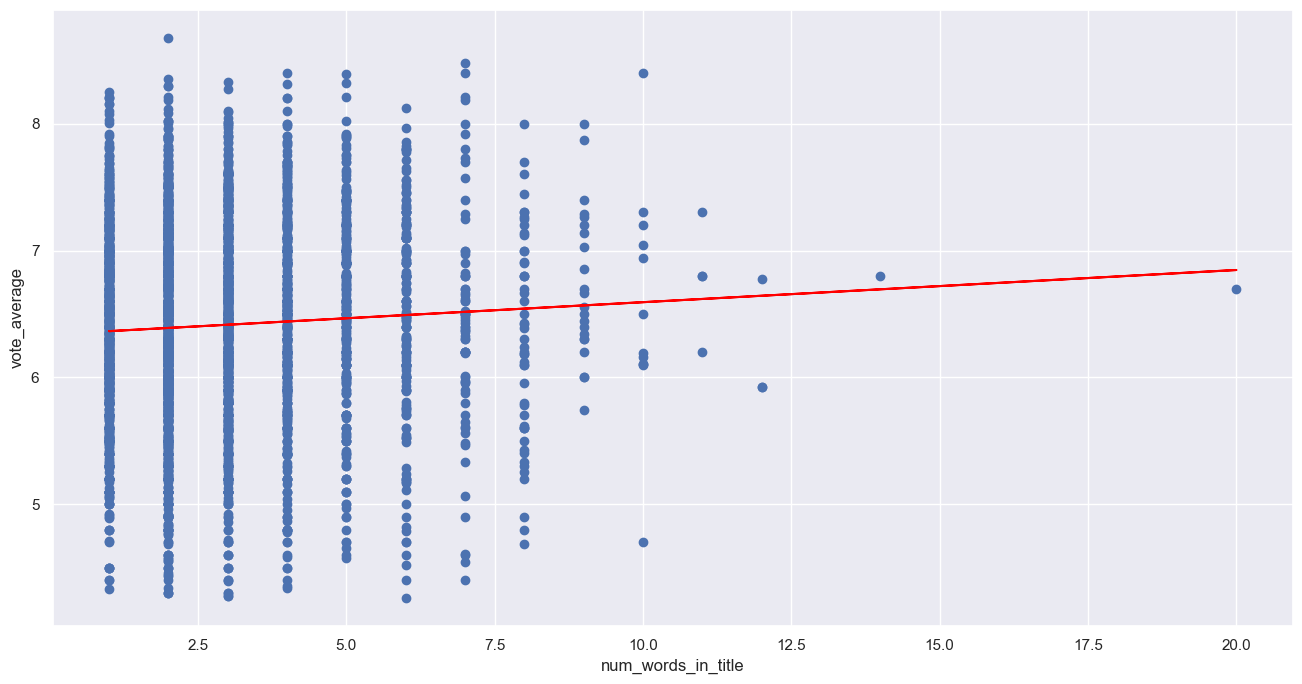

Intercept 	: b =  [6.45117254]
Coefficients 	: a =  [[-0.00584872]]
R^2 0.0001892546633115444


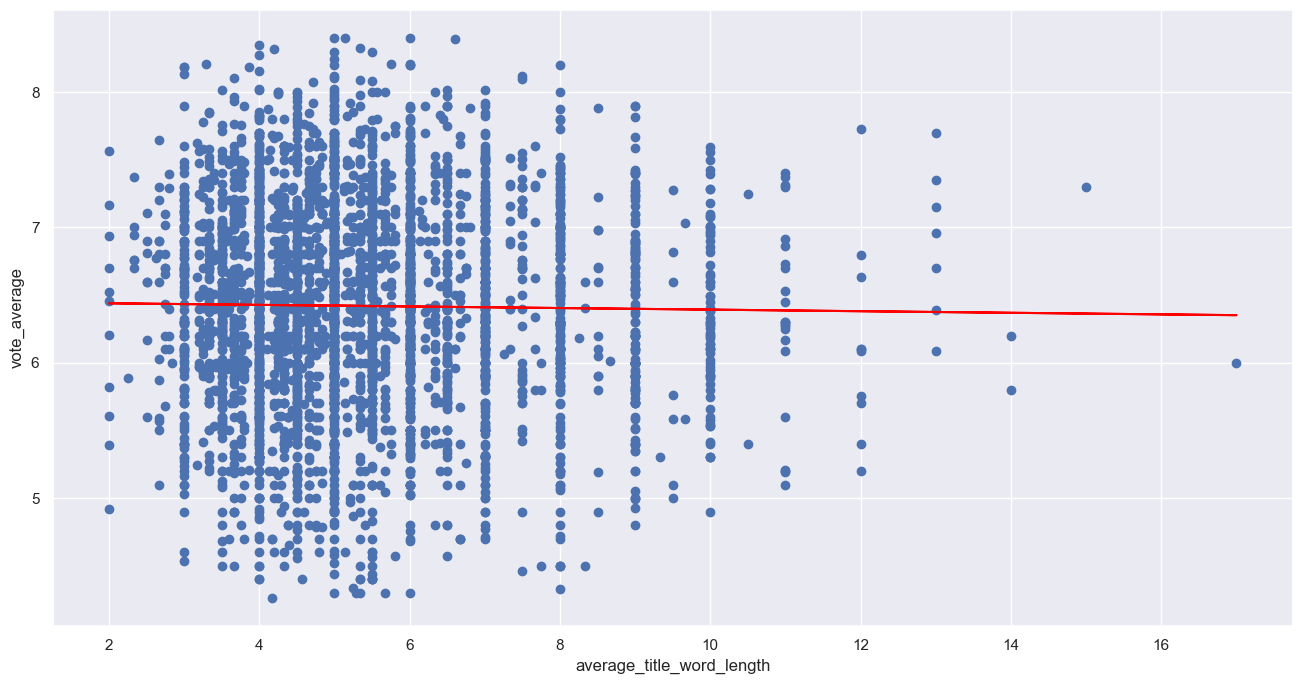

Intercept 	: b =  [6.39720096]
Coefficients 	: a =  [[0.0960021]]
R^2 0.0028747258007130183


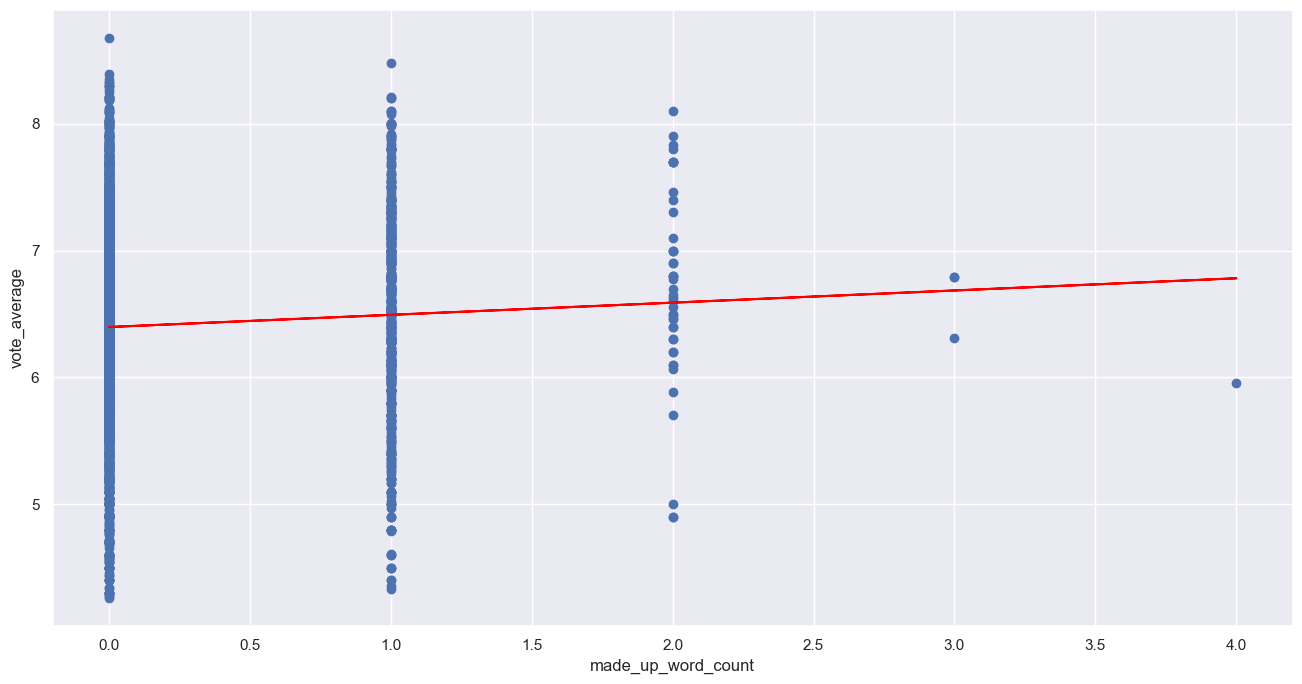

In [18]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'vote_average')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'vote_average')
title_length_linreg = performLinearRegression(data, 'title_length', 'vote_average')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'vote_average')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'vote_average')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'vote_average')

## Predictor vs. Popularity

Intercept 	: b =  [21.01520534]
Coefficients 	: a =  [[-0.00423857]]
R^2 3.187605779331193e-08


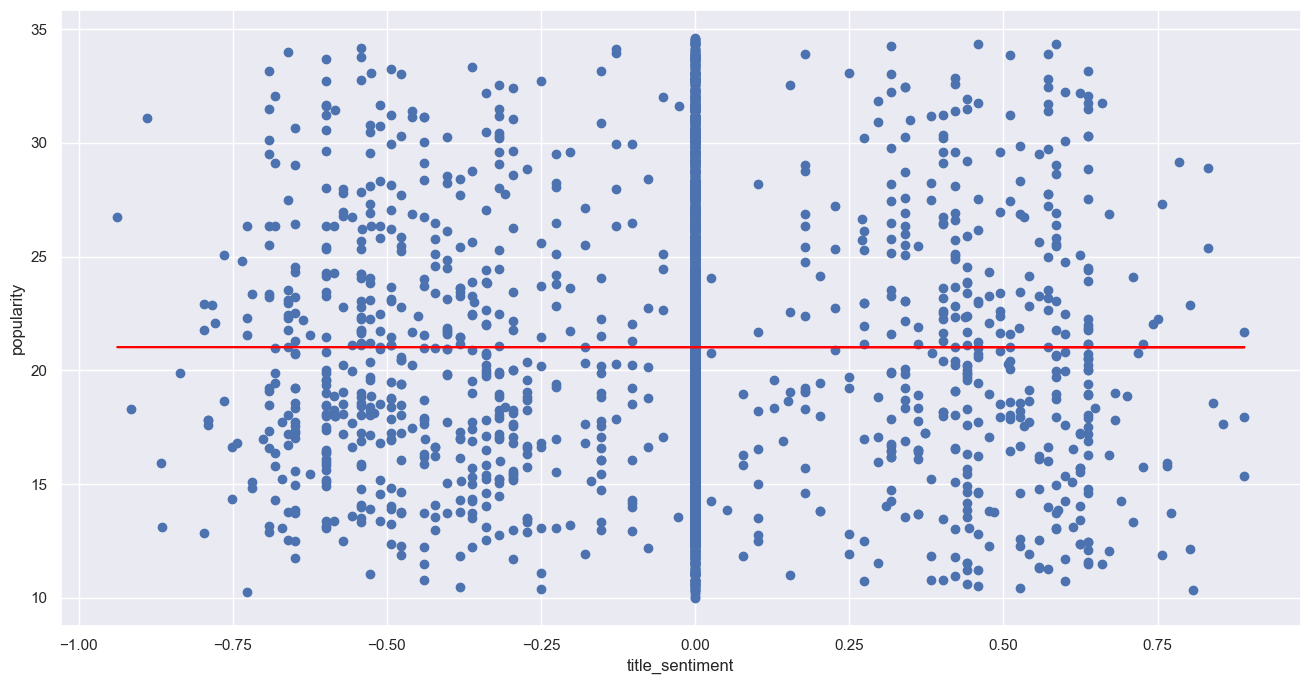

Intercept 	: b =  [21.00793223]
Coefficients 	: a =  [[-0.25401857]]
R^2 0.0007640100447761089


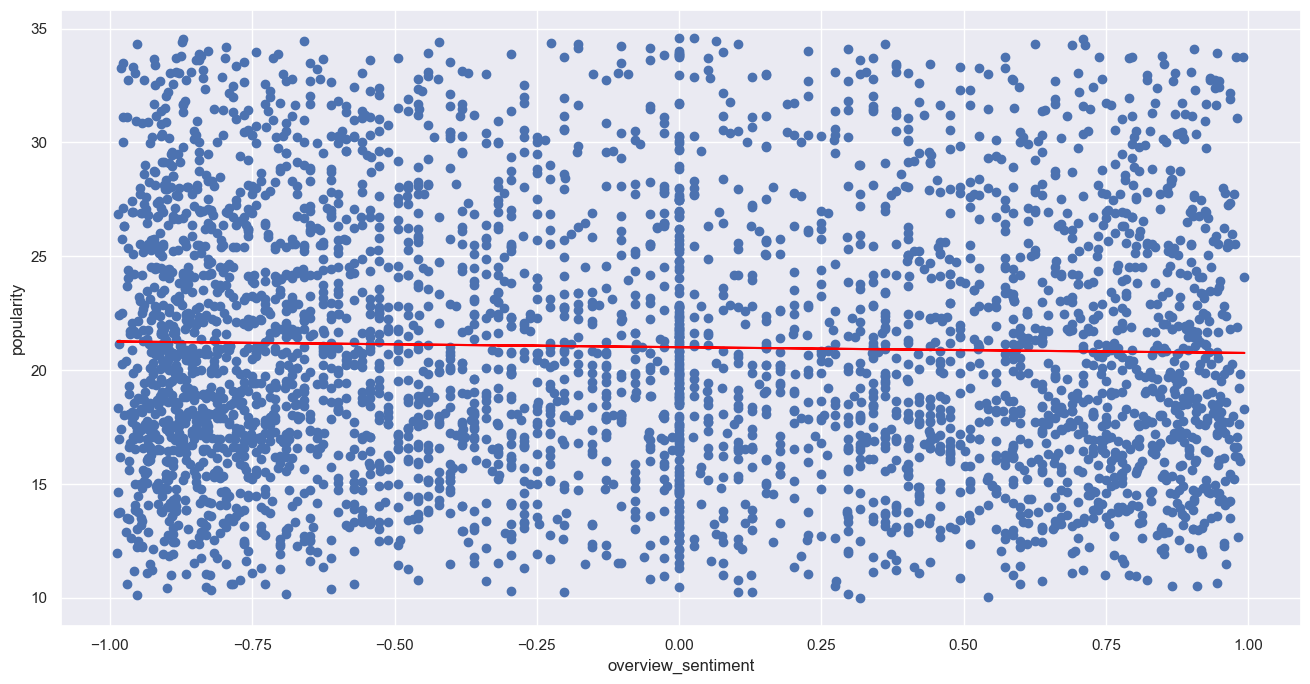

Intercept 	: b =  [21.13202492]
Coefficients 	: a =  [[-0.0082283]]
R^2 0.00019254179375383096


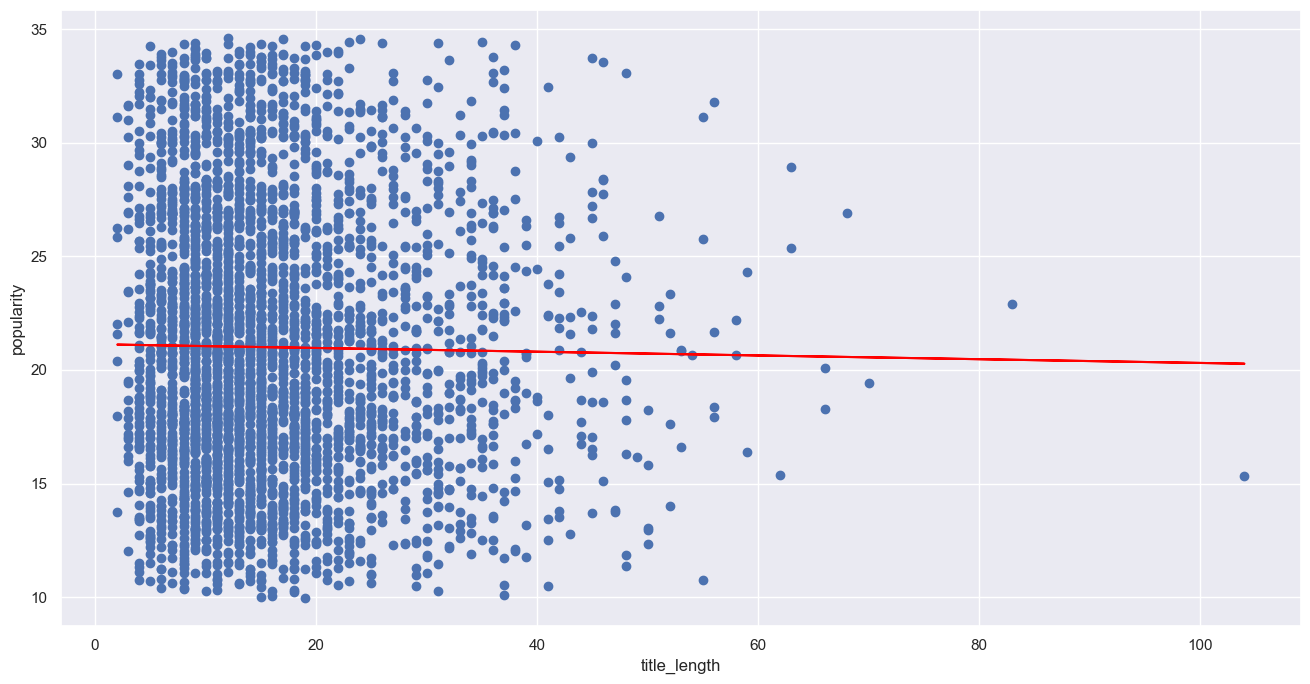

Intercept 	: b =  [21.27300512]
Coefficients 	: a =  [[-0.09695819]]
R^2 0.0008360618288608679


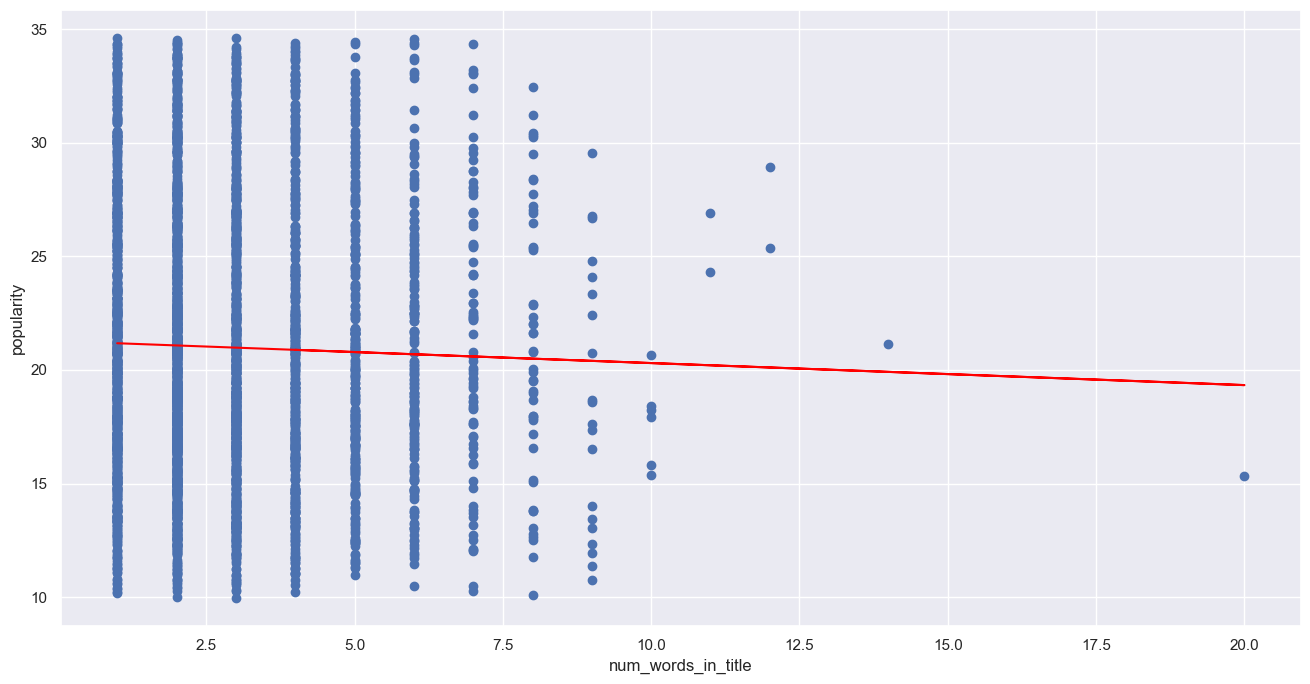

Intercept 	: b =  [20.95121098]
Coefficients 	: a =  [[0.01048207]]
R^2 1.081000949909594e-05


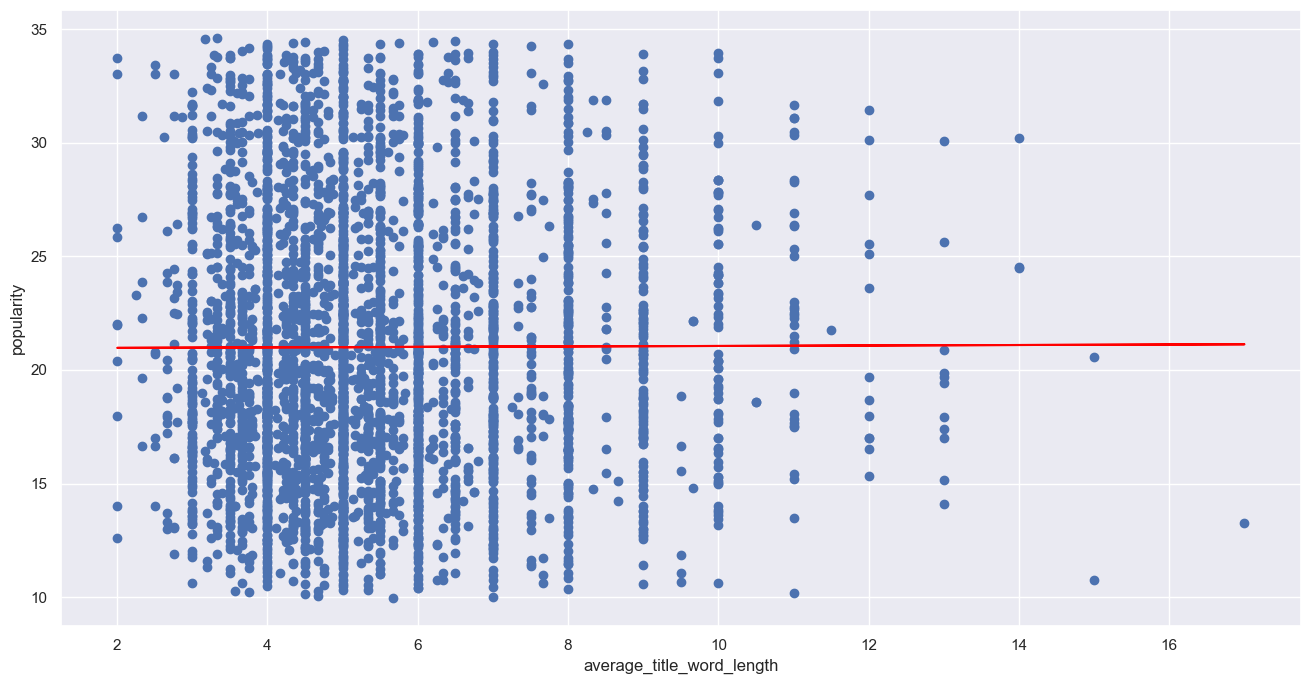

Intercept 	: b =  [20.88833916]
Coefficients 	: a =  [[0.17763936]]
R^2 0.0001706588395823383


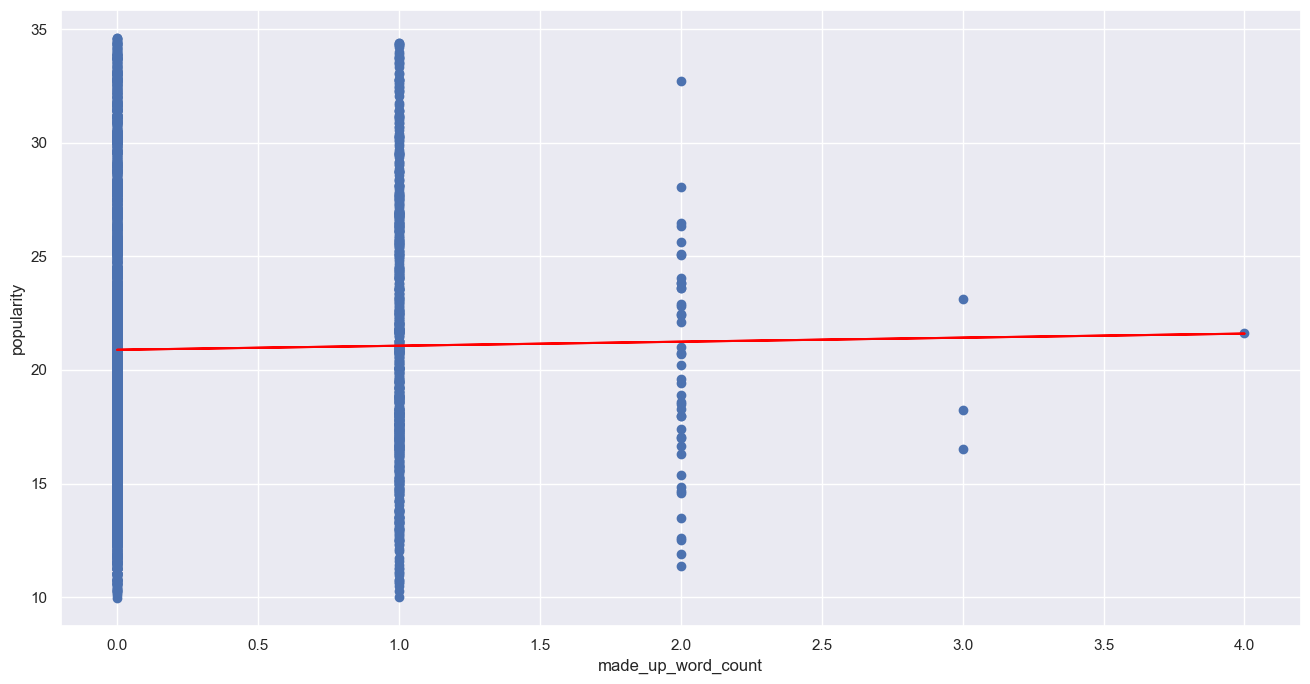

In [19]:
title_sentiment_linreg = performLinearRegression(data, 'title_sentiment', 'popularity')
overview_sentiment_linreg = performLinearRegression(data, 'overview_sentiment', 'popularity')
title_length_linreg = performLinearRegression(data, 'title_length', 'popularity')
num_words_in_title_linreg = performLinearRegression(data, 'num_words_in_title', 'popularity')
average_title_word_length_linreg = performLinearRegression(data, 'average_title_word_length', 'popularity')
made_up_word_count_linreg = performLinearRegression(data, 'made_up_word_count', 'popularity')

# Classification Tree

vote_average vs. has_made_up_word with depth 60


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 36.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Train Classification Accuracy 	: 0.8827017272492911
Test Classification Accuracy 	: 0.8731631863882444
Train Confusion Matrix
True Positive Rate: 0.29790660225442833
False Positive Rate: 0.005831798649478207
True Negative Rate: 0.9941682013505218
False Negative Rate: 0.7020933977455717
Test Confusion Matrix
True Positive Rate: 0.32608695652173914
False Positive Rate: 0.008466603951081843
True Negative Rate: 0.9915333960489181
False Negative Rate: 0.6739130434782609


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


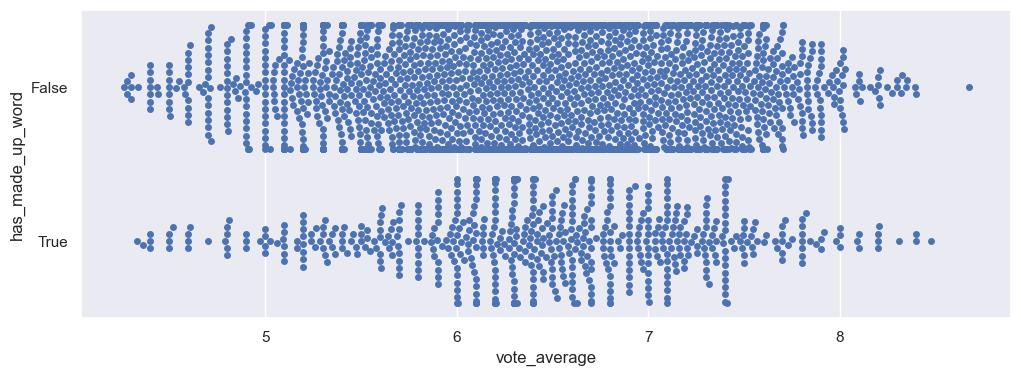

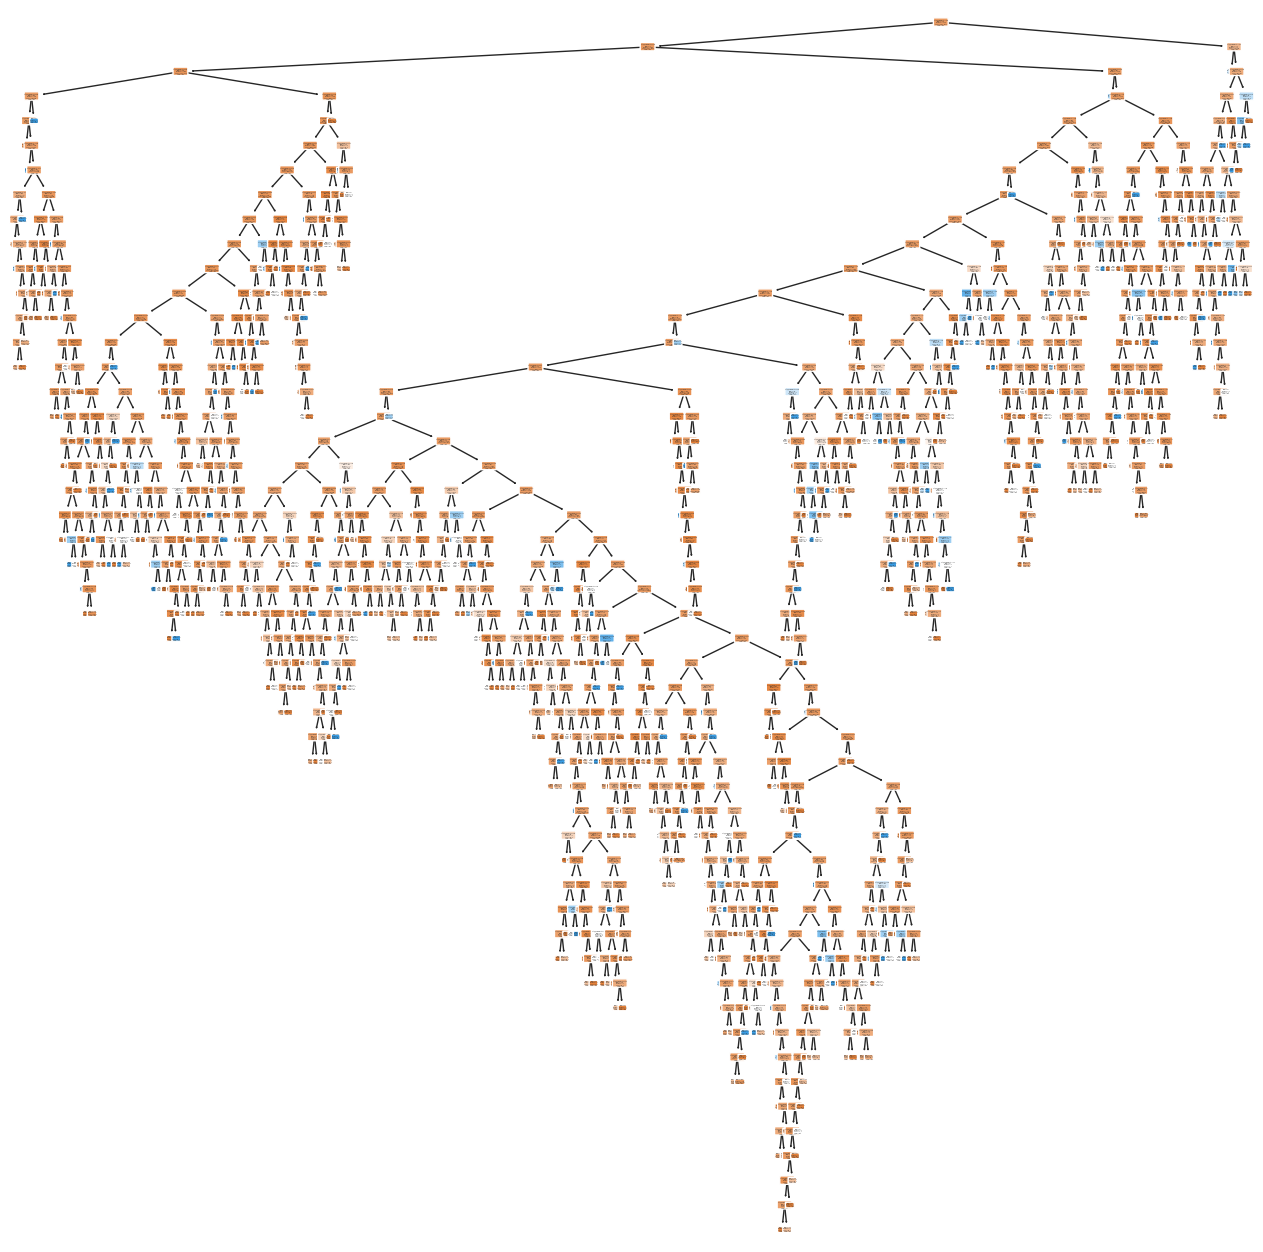

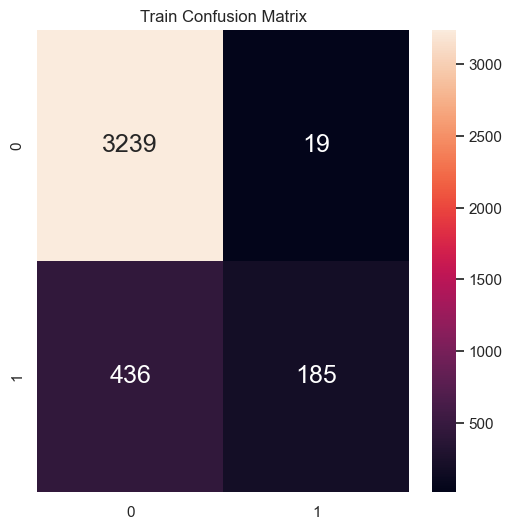

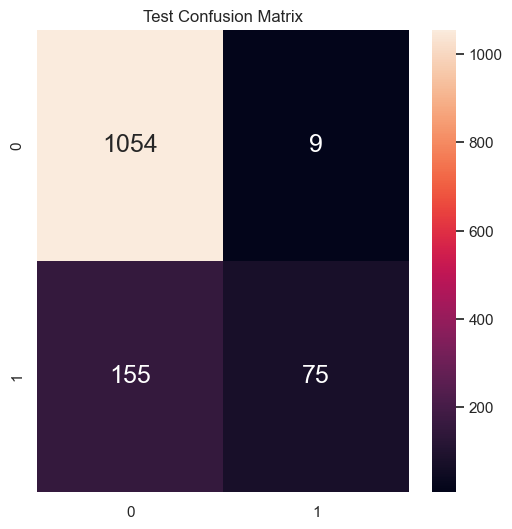

In [20]:
response_train_depth_4, response_train_pred_depth_4, response_test_depth_4, response_test_pred_depth_4 = generateClassificationTree(data,"vote_average",  "has_made_up_word", 60, ["No", "Yes"])
generateConfusionMatrix(response_train_depth_4, response_train_pred_depth_4, "Train Confusion Matrix")
generateConfusionMatrix(response_test_depth_4, response_test_pred_depth_4, "Test Confusion Matrix")

# Random Forest Classifier

vote_average vs. has_made_up_word with depth 80


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train Classification Accuracy 	: 0.8881154936839392
Test Classification Accuracy 	: 0.7965970610982211
Train Confusion Matrix
True Positive Rate: 0.358609794628752
False Positive Rate: 0.00862600123228589
True Negative Rate: 0.9913739987677141
False Negative Rate: 0.641390205371248
Test Confusion Matrix
True Positive Rate: 0.15137614678899083
False Positive Rate: 0.07255813953488371
True Negative Rate: 0.9274418604651162
False Negative Rate: 0.8486238532110092


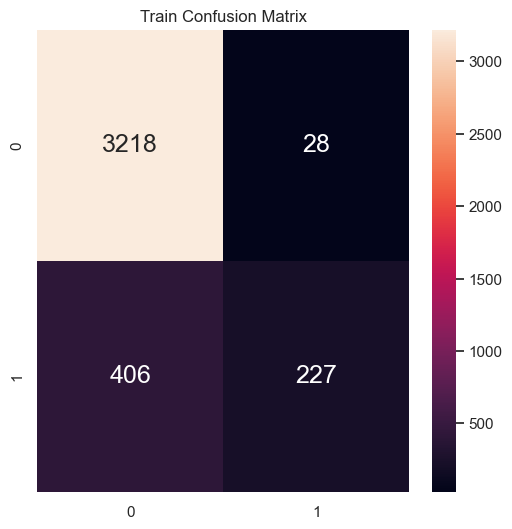

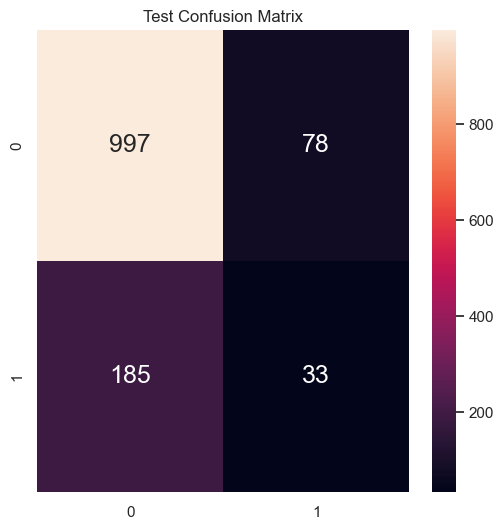

In [84]:
has_made_up_word_random_forest = generateRandomForestClassifier(data, "vote_average", "has_made_up_word", 150,80, ["No", "Yes"])
generateConfusionMatrix(has_made_up_word_random_forest[0], has_made_up_word_random_forest[1], "Train Confusion Matrix")
generateConfusionMatrix(has_made_up_word_random_forest[2], has_made_up_word_random_forest[3], "Test Confusion Matrix")